In [118]:
import pandas as pd
df=pd.read_csv("Downloads\Bengaluru_House_Data.csv")
df=df.drop(['area_type','society','balcony','availability'],axis='columns')
df=df.dropna()
df['bhk'] = df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head(3)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3


In [119]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True
df[~df['total_sqft'].apply(is_float)].head(3) #negation is mentioned to get not float

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2


In [120]:
def convert_sqft_to_num2(x):
    if isinstance(x, float):
        return x
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0]) + float(tokens[1])) / 2
    try:
        return float(x)
    except:
        return None
print(convert_sqft_to_num2('2100 - 2850'))
df=df.copy()
df.total_sqft=df.total_sqft.apply(convert_sqft_to_num2)
df=df[df.total_sqft.notnull()]
df.head(3)

2475.0


,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3


In [121]:
df['price_per_sqft']=pd.to_numeric(df['price'], errors='coerce')*100000/pd.to_numeric(df['total_sqft'], errors='coerce')
df.head(3)       #df['price_per_sqft']=df['price']*100000/df['total_sqft']
                  # 'price' and 'total_sqft' columns contain numerical values.so modified formula

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556


In [122]:
df.location=df.location.apply(lambda x: x.strip())
loc_stats=df['location'].value_counts(ascending=False)
loc_stats

location
Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: count, Length: 1287, dtype: int64

In [123]:
loc_stats_lessthan10=loc_stats[loc_stats<=10]
df.location=df.location.apply(lambda x: 'other' if x in loc_stats_lessthan10 else x )#This is a lambda function that checks if the location x is in the list loc_stats_lessthan10. If it is, it replaces the location with the string 'other'; otherwise, it leaves the location unchanged.
len(df.location.unique())                                                            #This is a common technique used to handle categorical variables with a large number of unique values, where some categories have very few occurrences.

241

In [124]:
print(df[df.total_sqft/df.bhk<300].head())

               location       size  total_sqft  bath  price  bhk  \
9                 other  6 Bedroom      1020.0   6.0  370.0    6   
45           HSR Layout  8 Bedroom       600.0   9.0  200.0    8   
58        Murugeshpalya  6 Bedroom      1407.0   4.0  150.0    6   
68  Devarachikkanahalli  8 Bedroom      1350.0   7.0   85.0    8   
70                other  3 Bedroom       500.0   3.0  100.0    3   

    price_per_sqft  
9     36274.509804  
45    33333.333333  
58    10660.980810  
68     6296.296296  
70    20000.000000  


In [125]:
df=df[~(((df.total_sqft)/(df.bhk))<300)]
print(df.shape)

(12456, 7)


In [126]:
df.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [127]:
#outlier removal in price_per_sqft(pps)
import numpy as np
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        st=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df1=remove_pps_outliers(df.copy())
print(df.shape)
print(df1.shape)

(12456, 7)
(10242, 7)


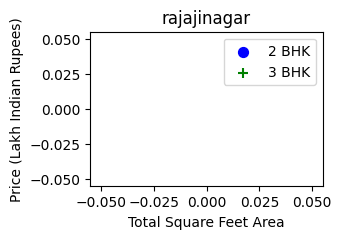

In [128]:
#dont get the output, go for next one
import matplotlib
import matplotlib.pyplot as plt
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    matplotlib.rcParams['figure.figsize'] = (3, 2)
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")

    plt.title(location)
    plt.legend()
plot_scatter_chart(df, "rajajinagar")
    

In [129]:
import matplotlib
import matplotlib.pyplot as plt
def plot_scatter_chart(df, location):
    """

    Args:
        df: A Pandas DataFrame containing the property data.
        location: The location for which to plot the scatter chart.
    """

    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]

    matplotlib.rcParams['figure.figsize'] = (15, 10)

    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft, bhk3.price, marker='+', color='green', label='3 BHK', s=50)

    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")

    plt.title(location)
    plt.legend()




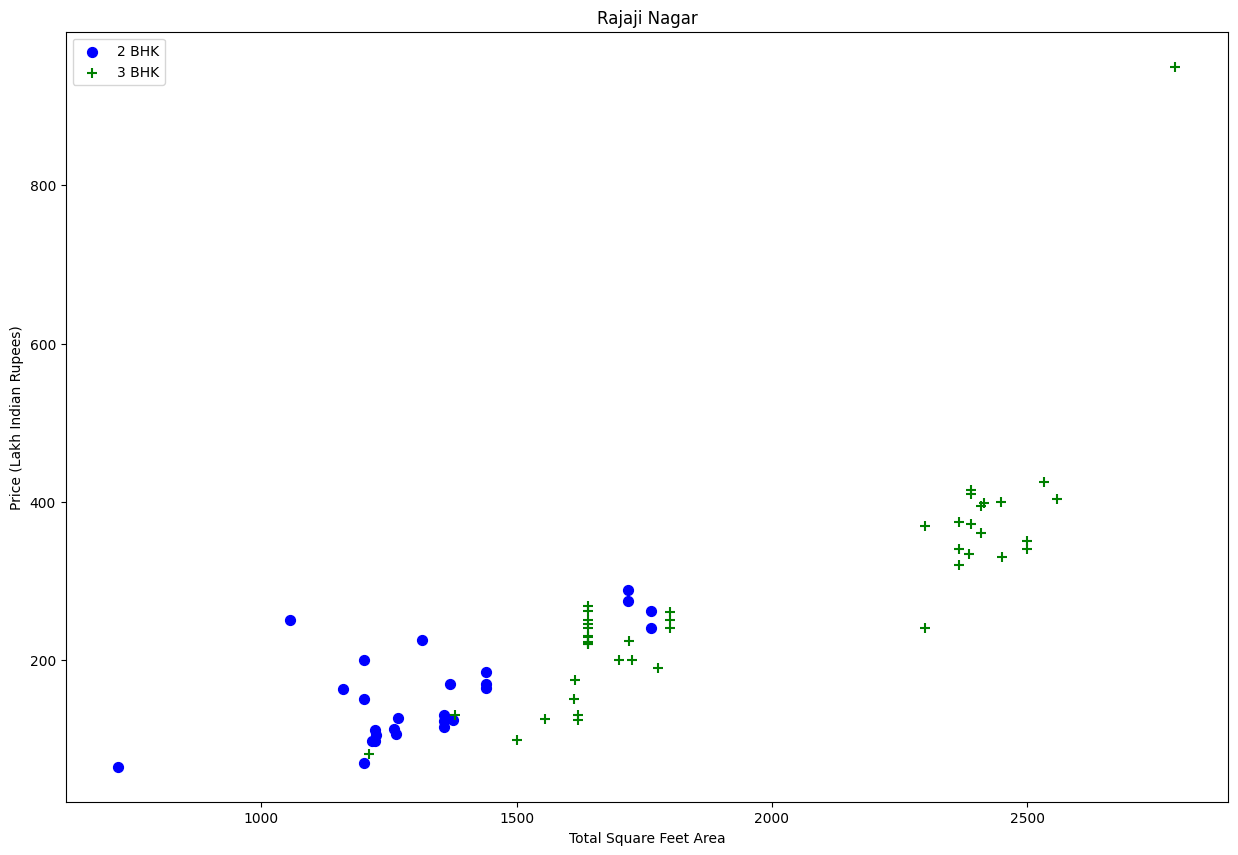

In [130]:
plot_scatter_chart(df, "Rajaji Nagar")###### observe all four graphs(1st g)

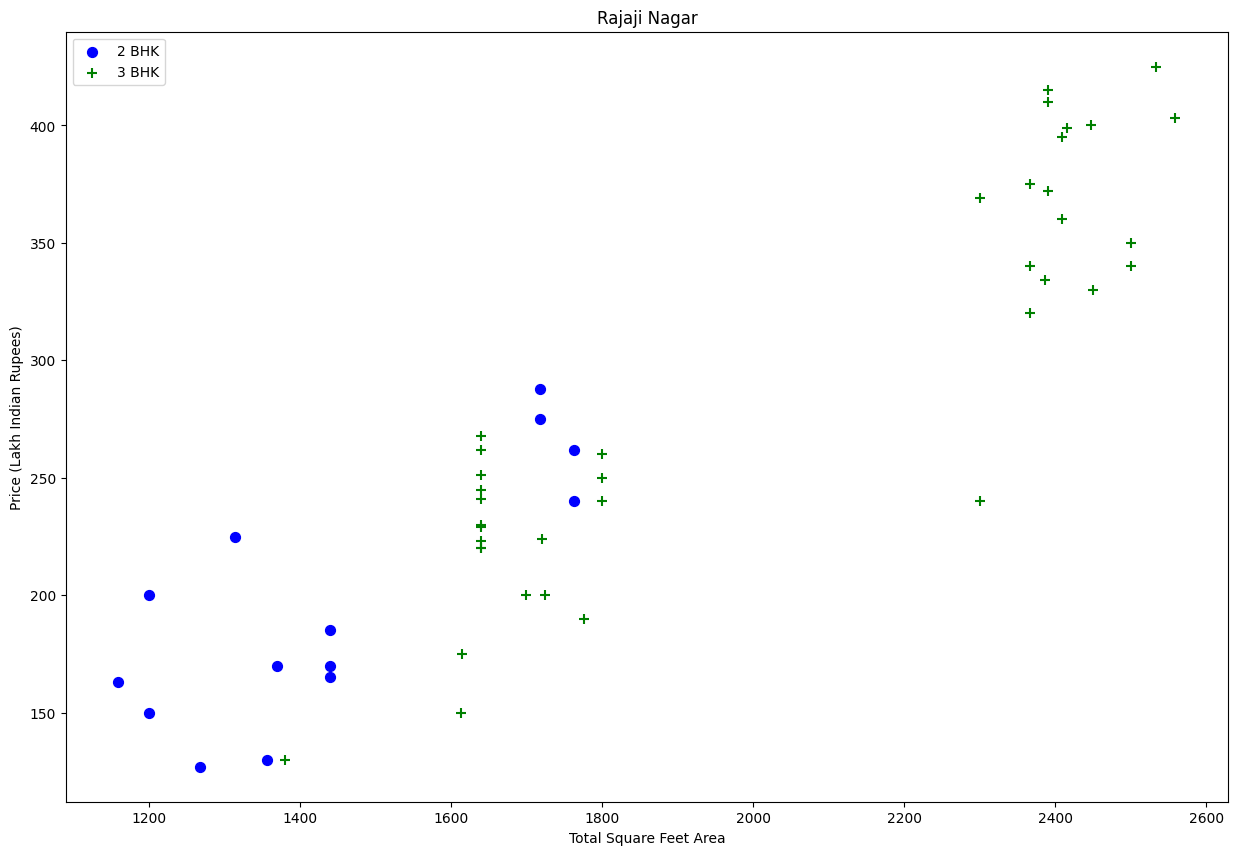

In [131]:
plot_scatter_chart(df1, "Rajaji Nagar")###### observe all four graphs(2nd g)

In [132]:
import numpy as np

def remove_bhk_outliers(df):
    exclude_indices = np.array([])

    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
            bhk_stats[bhk] = stats

        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] > 5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)

    return df.drop(exclude_indices, axis=0)

df2 = remove_bhk_outliers(df.copy())  # Use copy to avoid modifying the original DataFrame
print(df.shape)  ##??????????????????????????????????????????????????????????????????? i dont know but i came to know!!!!
print(df2.shape)  
print(df1.shape)
df3 = remove_bhk_outliers(df1.copy())
print(df3.shape)

(12456, 7)
(8638, 7)
(10242, 7)
(7317, 7)


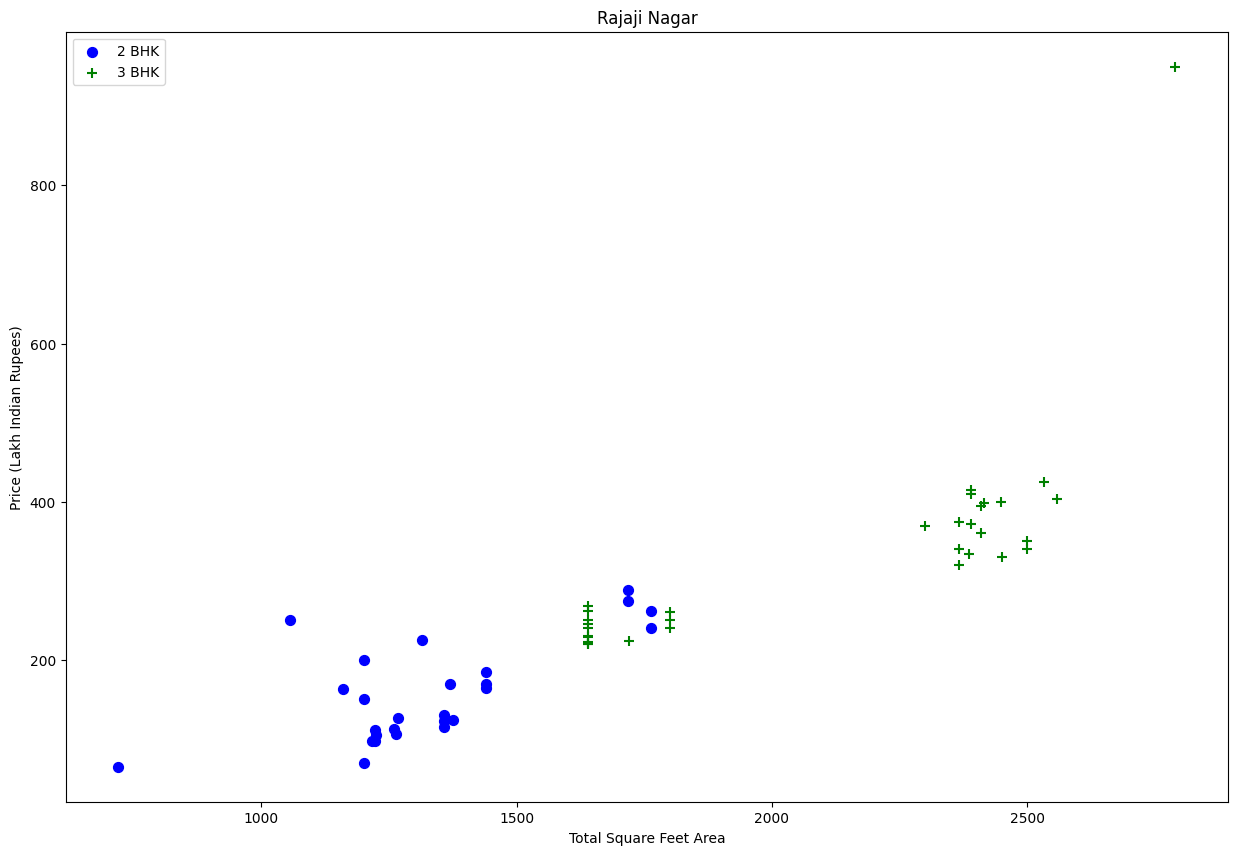

In [133]:
plot_scatter_chart(df2, "Rajaji Nagar")####### observe all four graphs(3rd g)

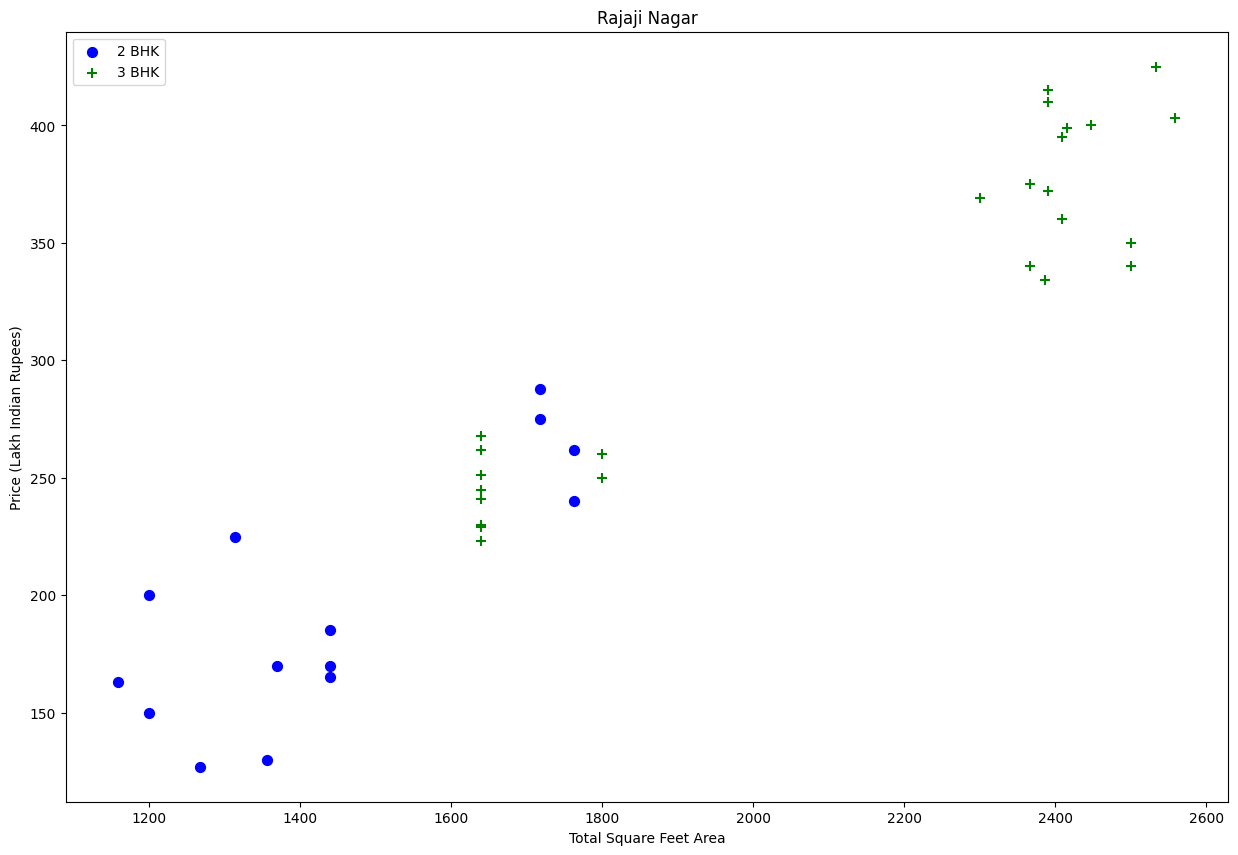

In [134]:
plot_scatter_chart(df3, "Rajaji Nagar")####### observe all four graphs(4th g)

In [89]:
###### observe all four graphs 
###### observe all four graphs
###### observe all four graphs

In [135]:
df3=df3[df3.bath<df3.bhk+2]
df3.shape

(7239, 7)

In [136]:
df3=df3.drop(['price_per_sqft','size'],axis='columns')
df3

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
...,...,...,...,...,...
10233,other,1200.0,2.0,70.0,2
10234,other,1800.0,1.0,200.0,1
10237,other,1353.0,2.0,110.0,2
10238,other,812.0,1.0,26.0,1


In [137]:
dummies=pd.get_dummies(df3.location)
dummies

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10234,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10237,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10238,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [138]:
dummies = dummies.astype(int)
dummies.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
df4=pd.concat([df3,dummies.drop('other',axis=1)],axis=1)
df4.tail(3)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
10237,other,1353.0,2.0,110.0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,other,812.0,1.0,26.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10241,other,3600.0,5.0,400.0,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
df5=df4.drop(['location'],axis=1)
df5

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10233,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10234,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10237,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [141]:
df5=df5.copy()

In [142]:
x=df5.drop('price',axis=1)
y=df5.price
print(x.head(3))
print(y.head(3))

   total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0    4                    1                   0   
1      1630.0   3.0    3                    1                   0   
2      1875.0   2.0    3                    1                   0   

   2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
0                          0                     0                     0   
1                          0                     0                     0   
2                          0                     0                     0   

   5th Phase JP Nagar  6th Phase JP Nagar  ...  Vijayanagar  \
0                   0                   0  ...            0   
1                   0                   0  ...            0   
2                   0                   0  ...            0   

   Vishveshwarya Layout  Vishwapriya Layout  Vittasandra  Whitefield  \
0                     0                   0            0           0   
1                    

In [143]:
y=df5.price
y

0        428.0
1        194.0
2        235.0
3        130.0
4        148.0
         ...  
10233     70.0
10234    200.0
10237    110.0
10238     26.0
10241    400.0
Name: price, Length: 7239, dtype: float64

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=143)
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_train,y_train)

0.8622251504615691

In [145]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
crs_val=ShuffleSplit(n_splits=5, test_size=0.2, random_state= 114433)
cross_val_score(LinearRegression(), x, y, cv=crs_val)

array([0.81359462, 0.82543586, 0.80345414, 0.77037929, 0.89118582])

In [146]:
### dont execute it
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    crs_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=114433)

    for algo_name, algo in algos.items():
        gscv = GridSearchCV(algo['model'], config['params'], cv=crs_val, return_train_score=False)
        gscv.fit(x, y)
        scores.append({
            'algo_name': algo_name,
            'best_params': gscv.best_params_,
            'best_score': gscv.best_score_
        })

    return pd.DataFrame(scores,columns=['algorithm','best_score','best_paramts'])
find_best_model_using_gridsearchcv(x,y)


NameError: name 'config' is not defined

In [147]:
### dont execute it
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None, 1, 2, 3],  # Adjust the number of jobs as needed
                'positive': [False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    crs_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=114433)

    for algo_name, algo in algos.items():
        gscv = GridSearchCV(algo['model'], algo['params'], cv=crs_val, return_train_score=False)
        gscv.fit(x, y)
        scores.append({
            'algo_name': algo_name,
            'best_params': gscv.best_params_,
            'best_score': gscv.best_score_
        })

    return pd.DataFrame(scores,columns=['algorithm','best_score','best_paramts'])
find_best_model_using_gridsearchcv(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,algorithm,best_score,best_paramts
0,NaN,0.820935,NaN
1,NaN,0.681634,NaN
2,NaN,0.708652,NaN


In [148]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'copy_X': [True, False],
                'fit_intercept': [True, False],
                'n_jobs': [None, 1, 2, 3],  # Adjust the number of jobs as needed
                'positive': [False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }

    scores = []

    crs_val = ShuffleSplit(n_splits=5, test_size=0.2, random_state=114433)

    for algo_name, algo in algos.items():
        gscv = GridSearchCV(algo['model'], algo['params'], cv=crs_val, return_train_score=False)
        gscv.fit(x, y)
        scores.append({
            'algorithm': algo_name,
            'best_paramts': gscv.best_params_,
            'best_score': gscv.best_score_
        })

    return pd.DataFrame(scores,columns=['algorithm','best_score','best_paramts'])
find_best_model_using_gridsearchcv(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

,algorithm,best_score,best_paramts
0,linear_regression,0.820935,"{'copy_X': True, 'fit_intercept': False, 'n_jo..."
1,lasso,0.681681,"{'alpha': 1, 'selection': 'random'}"
2,decision_tree,0.710480,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [149]:
def predict_price(location,sqft,bath,bhk):
    loc_index = np.where(x.columns==location)[0][0]
    p=np.zeros(len(x.columns))
    p[0]=sqft
    p[1]=bhk
    p[2]=bath
    if loc_index>=0:
        p[loc_index]=1
    return model.predict([p])[0]

In [150]:
print(predict_price('Indira Nagar', 1000, 2, 2))
print(predict_price('Indira Nagar', 1000, 3, 3))
print(predict_price('1st Phase JP Nagar', 1000, 2, 2))
print(predict_price('1st Phase JP Nagar', 1000, 3, 3))

175.08231639821312
174.57343530362132
89.4455683151006
88.93668722050879


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [151]:
import pickle
with open('beng_hous_pred.pikl','wb') as f:
    pickle.dump(model,f)

In [152]:
import json
columns={
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns_bhp.json","w") as f:
    f.write(json.dumps(columns))